# Queries for Rhetorical Analysis
## Getting TF ready

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [6]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... failed
GitHub says: 403 {'message': "API rate limit exceeded for 93.229.46.177. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)", 'documentation_url': 'https://developer.github.com/v3/#rate-limiting'}
The offline TF-app may not be the latest
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest? release)
	connecting to online GitHub repo etcbc/bhsa ... failed
GitHub says: 403 {'message': "API rate limit exceeded for 93.229.46.177. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)", 'documentation_url': 'https://developer.github.com/v3/#rate-limiting'}
The offline data may not be the latest
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6 (latest? release)
	connecting to onlin

## TJ ending as non 1sgC
If we distinguish between ketiv, qere and orthographic variations its handy to have compare the different display options of `fmt`:
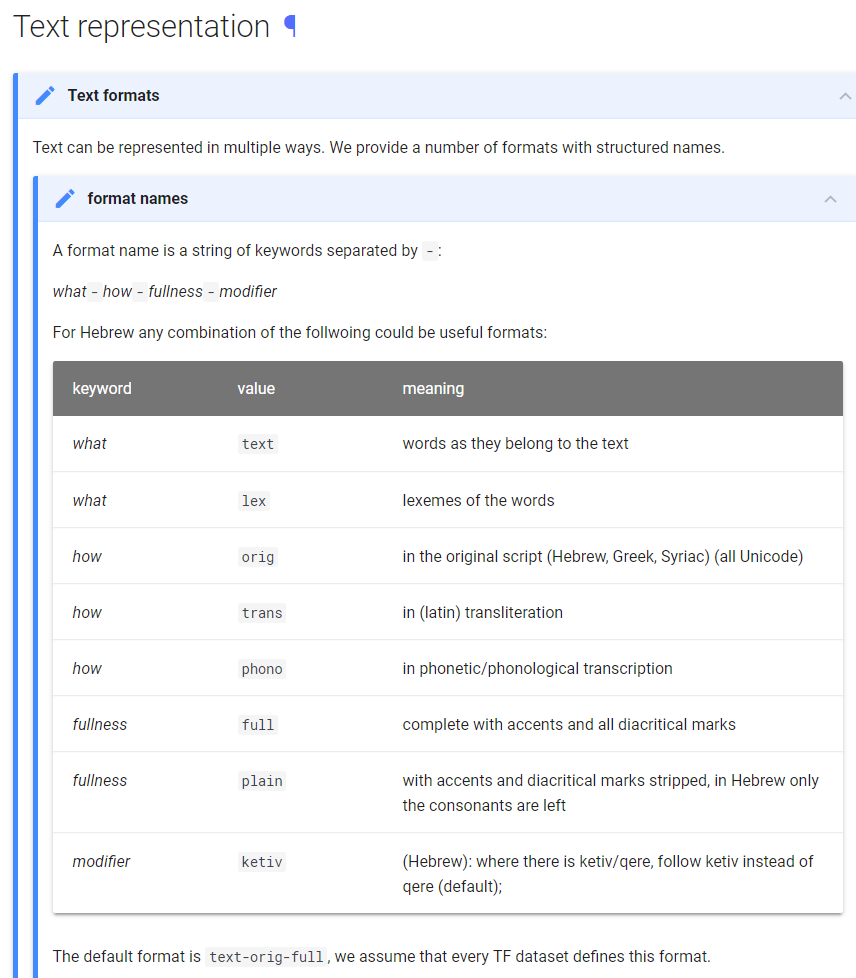

You can see what formats have been setup by running the command `T.formats`.

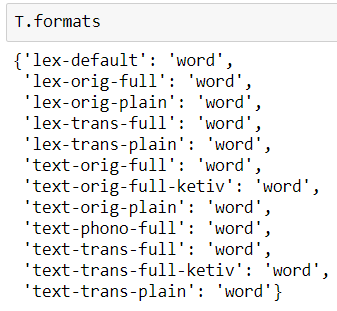


One can use for example the handy configuration: `extraFeatures='qere_utf8', fmt='text-orig-full-ketiv'` as it will show both the qere and the ketiv.

The feature ```g_word_utf8``` alway shows the ketiv! When there is a ketiv-qere issue, the `g_word_utf8` will show no vowel indicators while the ```qere_utf8``` will show the qere vowels:

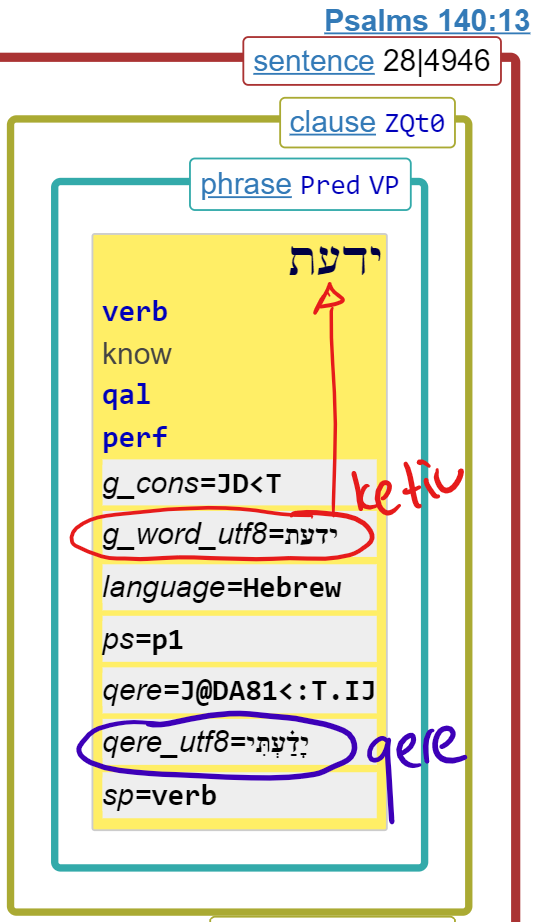



Lets search for all those cases where a qatal/perfect "T" ending is not taken as 2sgF but as 1sgC.

In [7]:
Tis1sgC = '''
book book*
    word sp=verb g_cons~.*T$ ps=p1 vt=perf qere* g_word_utf8* language=Hebrew
'''
Tis1sgC  = A.search(Tis1sgC)
A.show(Tis1sgC, start=3, end=3, condensed=True, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv')

  0.58s 4 results


In [8]:
T.formats

{'lex-default': 'word',
 'lex-orig-full': 'word',
 'lex-orig-plain': 'word',
 'lex-trans-full': 'word',
 'lex-trans-plain': 'word',
 'text-orig-full': 'word',
 'text-orig-full-ketiv': 'word',
 'text-orig-plain': 'word',
 'text-phono-full': 'word',
 'text-trans-full': 'word',
 'text-trans-full-ketiv': 'word',
 'text-trans-plain': 'word'}

In [9]:
Tjnot1sgC = '''
book book*
    word g_vbe~.*T.*I.*J.*$ sp=verb ps#p1 qere* g_word_utf8* language=Hebrew
'''
Tjnot1sgC  = A.search(Tjnot1sgC)
A.show(Tjnot1sgC, start=1, end=10, condensed=True,  extraFeatures='qere_utf8', fmt='text-orig-full-ketiv')

  0.52s 7 results


In [10]:
A.export(Tjnot1sgC, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='Tjnot1sgC.tsv')

In [11]:
Tjnot1sgC=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/Tjnot1sgC.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
Tjnot1sgC.head(1)

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,g_vbe2,g_word_utf82,language2,ps2,qere2,sp2
0,1,Jeremiah,2,20,426597,book,Jeremia,235698,word,שָׁבַ֣רְתִּי,[T.IJ,שָׁבַ֣רְתִּי,Hebrew,p2,NaN,verb


In [12]:
Tjnot1sgC["S1"].value_counts()

Jeremiah         4
Ezekiel          2
Song_of_songs    1
Name: S1, dtype: int64

## YHWH speach introductions
### "And YHWH spoke/said/called"

In [13]:
YHWHspeech1 = '''
clause
    phrase function=Pred|PreO|PreC
        word lex=DBR[|>MR[|QR>[
    phrase function=Subj
        word lex=JHWH/|>LHJM/
'''
YHWHspeech1  = A.search(YHWHspeech1)
A.table(YHWHspeech1, start=1, end=2, condensed=True, extraFeatures='g_word_utf8')

  1.46s 1200 results


n,p,verse,word,word,clause,phrase,phrase
1,Genesis 1:3,וַיֹּ֥אמֶר אֱלֹהִ֖ים יְהִ֣י אֹ֑ור וַֽיְהִי־אֹֽור׃,יֹּ֥אמֶר,אֱלֹהִ֖ים,וַיֹּ֥אמֶר אֱלֹהִ֖ים,יֹּ֥אמֶר,אֱלֹהִ֖ים
2,Genesis 1:5,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום וְלַחֹ֖שֶׁךְ קָ֣רָא לָ֑יְלָה וַֽיְהִי־עֶ֥רֶב וַֽיְהִי־בֹ֖קֶר יֹ֥ום אֶחָֽד׃ פ,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום,יִּקְרָ֨א,אֱלֹהִ֤ים׀,יִּקְרָ֨א,אֱלֹהִ֤ים׀


In [14]:
A.export(YHWHspeech1, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='YHWHspeech1.tsv')

In [15]:
YHWHspeech1=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/YHWHspeech1.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
YHWHspeech1.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5
0,1,Genesis,1,3,427557,clause,וַיֹּ֥אמֶר אֱלֹהִ֖ים,651558,phrase,יֹּ֥אמֶר,Pred,33,word,יֹּ֥אמֶר,>MR[,651559,phrase,אֱלֹהִ֖ים,Subj,34,word,אֱלֹהִ֖ים,>LHJM/


In [16]:
YHWHspeech1["S1"].value_counts()

Jeremiah        252
Ezekiel         145
Exodus          103
Isaiah           92
Numbers          88
Genesis          72
2_Kings          50
Deuteronomy      50
1_Kings          40
Leviticus        39
Joshua           34
Amos             31
Zechariah        29
2_Chronicles     28
Malachi          27
Judges           23
1_Samuel         20
2_Samuel         15
1_Chronicles     13
Psalms           11
Haggai            9
Job               9
Micah             5
Hosea             4
Jonah             4
Joel              3
Obadiah           2
Zephaniah         1
Nahum             1
Name: S1, dtype: int64

### "And the word of YHWH happened"

In [17]:
YHWHspeech2 = '''
clause
    phrase function=Pred|PreO|PreC
        word lex=HJH[
    phrase function=Subj
        word lex=DBR/ st=c
        <: word lex=JHWH/
'''
YHWHspeech2  = A.search(YHWHspeech2)
A.table(YHWHspeech2, start=1, end=2, condensed=True, extraFeatures='g_word_utf8')

  1.83s 119 results


n,p,verse,phrase,word,clause,word,phrase,word
1,Genesis 15:1,אַחַ֣ר׀ הַדְּבָרִ֣ים הָאֵ֗לֶּה הָיָ֤ה דְבַר־יְהוָה֙ אֶל־אַבְרָ֔ם בַּֽמַּחֲזֶ֖ה לֵאמֹ֑ר אַל־תִּירָ֣א אַבְרָ֗ם אָנֹכִי֙ מָגֵ֣ן לָ֔ךְ שְׂכָרְךָ֖ הַרְבֵּ֥ה מְאֹֽד׃,הָיָ֤ה,הָיָ֤ה,אַחַ֣ר׀ הַדְּבָרִ֣ים הָאֵ֗לֶּה הָיָ֤ה דְבַר־יְהוָה֙ אֶל־אַבְרָ֔ם בַּֽמַּחֲזֶ֖ה,דְבַר־,דְבַר־יְהוָה֙,יְהוָה֙
2,1_Samuel 3:1,וְהַנַּ֧עַר שְׁמוּאֵ֛ל מְשָׁרֵ֥ת אֶת־יְהוָ֖ה לִפְנֵ֣י עֵלִ֑י וּדְבַר־יְהוָ֗ה הָיָ֤ה יָקָר֙ בַּיָּמִ֣ים הָהֵ֔ם אֵ֥ין חָזֹ֖ון נִפְרָֽץ׃ ס,הָיָ֤ה,וּדְבַר־יְהוָ֗ה הָיָ֤ה יָקָר֙ בַּיָּמִ֣ים הָהֵ֔ם,דְבַר־יְהוָ֗ה,הָיָ֤ה,דְבַר־,יְהוָ֗ה


In [18]:
A.export(YHWHspeech2, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='YHWHspeech2.tsv')

In [19]:
YHWHspeech2=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/YHWHspeech2.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
YHWHspeech2.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5,st5,NODE6,TYPE6,TEXT6,lex6
0,1,Genesis,15,1,428723,clause,אַחַ֣ר׀ הַדְּבָרִ֣ים הָאֵ֗לֶּה הָיָ֤ה דְבַר־יְ...,655186,phrase,הָיָ֤ה,Pred,6675,word,הָיָ֤ה,HJH[,655187,phrase,דְבַר־יְהוָה֙,Subj,6676,word,דְבַר־,DBR/,c,6677,word,יְהוָה֙,JHWH/


In [20]:
YHWHspeech2["S1"].value_counts()

Ezekiel         50
Jeremiah        31
1_Kings         10
Zechariah        9
Haggai           5
2_Samuel         2
1_Samuel         2
Jonah            2
Isaiah           2
2_Chronicles     2
Daniel           1
Genesis          1
2_Kings          1
1_Chronicles     1
Name: S1, dtype: int64

# Finding Anaphers!
```
select all objects where
[book book IN (Threni)
	[clause
		[word FOCUS FIRST [word AS samelex]]
	]
	[clause
		[word FOCUS FIRST [word FOCUS lex = samelex.lex]]
	]
]
```

In [21]:
anapher1 = '''
book book=Jeremia
    word g_vbe~.*T.*I.*J.*$ sp=verb ps#p1
'''
anapher1  = A.search(anapher1)
A.table(anapher1, start=1, end=20, condensed=True, extraFeatures='g_word_utf8')

  0.57s 4 results


```
phrase
/with/
  word
  < word
/-/
/without/
  w1:word
  < w2:word

w1 .lex#lex. w2
/-/
```